# Прогнозирование оттока клиентов из телекоммуникационных компаний
## 0. Описание задачи


Решение задачи направлено на прогнозирование поведения клиентов телекомуникационной компании. Для объекта с определенным набором признаков программа должна предсказывать откажется ли клиент от предоставляемых услуг в ближайшее время. 

*Содержание*
Данные об оттоке клиентов телекоммуникационной компании содержат информацию о вымышленной телекоммуникационной компании, которая предоставляла услуги домашнего телефона и Интернета 7043 клиентам в Калифорнии в 3 квартале. 

Каждая строка представляет клиента, каждый столбец содержит атрибуты клиента, описанные в метаданных столбца.
Для каждого клиента включено несколько важных демографических показателей, а также показатель удовлетворенности, показатель оттока и индекс ценности жизни клиента (CLTV).


***Содержание набора данных:***
1. Клиенты, которые ушли в течение последнего месяца – данный признак является целевым **Churn** - Отток клиентов
2. Услуги, на которые зарегистрировался каждый клиент – **телефон, несколько линий, Интернет, онлайн-безопасность, онлайн-резервное копирование, защита устройств, техническая поддержка, потоковое телевидение и фильмы**
3. Информация об учетной записи клиента – **как долго он был клиентом, контракт, способ оплаты, безбумажное выставление счетов, ежемесячные платежи и общая сумма сборов**
4. Демографическая информация о клиентах – **пол, возрастной диапазон, а также есть ли у них партнеры и иждивенцы**



## 1. Чтение данных

In [1]:
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline 
  
import pandas as pd        
import seaborn as sns        
import sklearn   
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
url = "https://raw.githubusercontent.com/Maria-Volkova98/-/main/Telco-Customer-Churn.csv"
data_raw = pd.read_csv(url)

Размер таблицы:

In [3]:
data_raw.shape

(7043, 21)

In [4]:
data_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data_raw.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Рассмотрим более подробную информацию о данных:

In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Проанализировав таблицу можно сделать следующие выводы:

1. Первый признак не повлияет на классификацию, поэтому удалим его.
2. Признак **TotalCharges**(общие расходы клиента) он имеет не числовой тип. 
В Exel было проведено исследование столбца TotalCharges и обнаружено, что некоторые ячейки содержат пробелы. 
3. Пропущенных значений нет.
4. Большинство столбцов содержат категориальные значения. Пока они имеют тип 'Object'. Заменим тип на специальный, предназначенный для хранения категориальных значений.

Удаление признака **customerID**:

In [7]:
data_raw = data_raw.drop (columns = 'customerID')

Поработаем над признаком **TotalCharges**:

In [8]:
data_raw.loc[488, 'TotalCharges']

' '

Определим, сколько объектов со значениями ' '


In [9]:
data_raw.loc[(data_raw.TotalCharges == " "), 'TotalCharges'].count()

11

Удалим строки с пропущенными значениями, в нашем случае это разумно, так как таких строк всего 11

In [10]:
rows_to_drop = data_raw[(data_raw['TotalCharges'] == " ")].index
data = data_raw.drop(rows_to_drop)
data.shape


(7032, 20)

Столбец 'TotalCharges' пока имеет тип 'Object', заменим тип на вещественный.

In [11]:
data['TotalCharges'] = data['TotalCharges'].astype('float64')

Все объекты, имеющие тип *'object'* преобразуем к специальному категориальному типу *'category'*:

In [12]:
categorical_columns = []
numerical_columns = []
for c in data.columns:
    if data[c].dtype.name == 'object':
        categorical_columns.append(c)
        data[c]=data[c].astype('category')
    else:
        numerical_columns.append(c)
print(categorical_columns)
print(numerical_columns)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


Информация о датасете:

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   category
 3   Dependents        7032 non-null   category
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   category
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   category
 16  PaymentMethod     7032 n

## 2. Визуализация данных и вычисление основных характеристик

*Сводная информация о количественных признаках*

In [14]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Для каждого количественного признака (**tenure** - количество месяцев пользования услугами, **MonthlyCharges** - ежемесячные платежи,**TotalCharges** - общие расходы клиента) приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.


Рассмотрим сводную информацию о категориальных признаках:

In [15]:
data.describe(include=['category'])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


Для каждого категориального признака приведены общее количество значений, количество уникальных значений, наиболее часто встречающийся элемент и общее количество таких элементов.

Классы оттока клиентов являются несбалансированными:

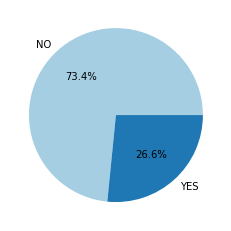

In [16]:
plt.pie(data.Churn.value_counts(), labels = ["NO", "YES"],  colors = sns.color_palette("Paired"), autopct = '%1.1f%%')
pass

В большинстве случаев люди не отказываются от услуг компании.

Построим диаграмму рассеивания для признаков ''MonthlyCharges'' и 'tenure':

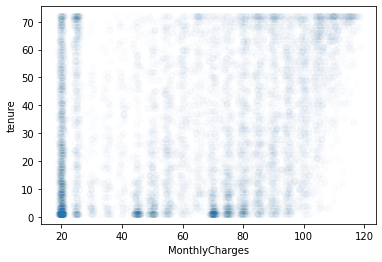

In [17]:
plt.scatter(data['MonthlyCharges'], data['tenure'], alpha=0.01)
plt.xlabel('MonthlyCharges')
plt.ylabel('tenure')
pass

Из рисунка видно, что, по-видимому, никакой зависимости между количеством месяцев пользования услугами компании и ежемесячными платежами нет.

Построим диаграмму рассеивания для признаков ''MonthlyCharges'' и 'InternetService':

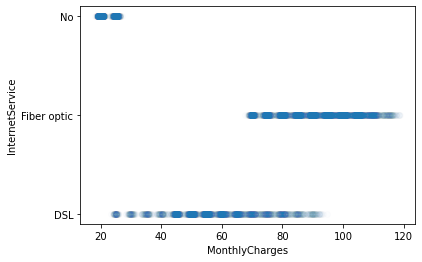

In [18]:
plt.scatter(data['MonthlyCharges'], data['InternetService'], alpha=0.01)
plt.xlabel('MonthlyCharges')
plt.ylabel('InternetService')
pass

Данный график показывает зависимость стоимости тарифа от выбора интернет-сервиса: тариф с Fiber optic наибоее дорогостоющий, более дешевый вариант - DSL, естественно цена будет минимальной, если отказаться от Интернет сервиса.

Построим все возможные диаграммы рассеивания для каждой пары переменных:

In [19]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)

No handles with labels found to put in legend.


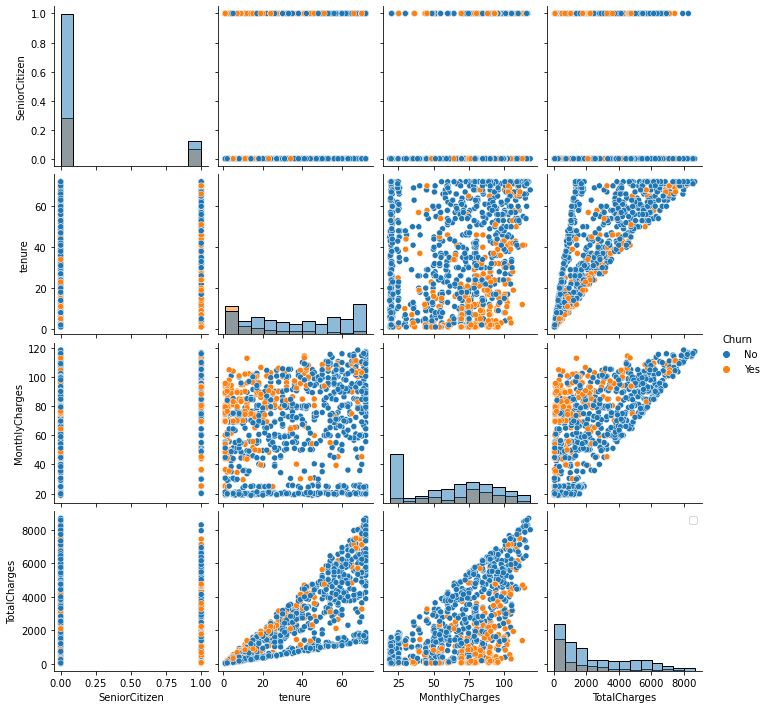

In [20]:
sns.pairplot(data.iloc[random_subset], hue='Churn', diag_kind='hist')
plt.legend()
pass

На диаграммах наблюдается корреляция между **tenure** и **TotalCharges**, а так же между **MonthlyCharges** и **TotalCharges**.
Это означает, что существуют зависимости между количеством месяцев пользования услугами компании и общей суммой расходов клиента, а так же между ежемесячными платежами и общей суммой расходов клиента.

Количество мужчин и женщин практически равное:

In [21]:
data['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

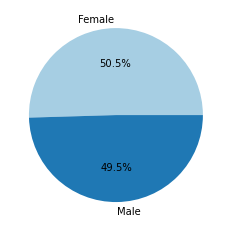

In [22]:
plt.pie(data.gender.value_counts(), labels = ["Female", "Male"],  colors = sns.color_palette("Paired"), autopct = '%1.1f%%')
pass

Мужчины и женцины отказываются от услуг компании примерно в равных количествах.

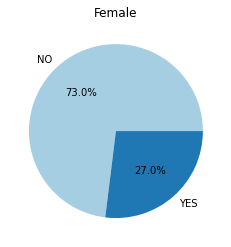

In [23]:
df=data.loc[data.gender == 'Female', ]
plt.title('Female')
plt.pie(df.Churn.value_counts(), labels = ["NO", "YES"],  colors = sns.color_palette("Paired"), autopct = '%1.1f%%')
pass


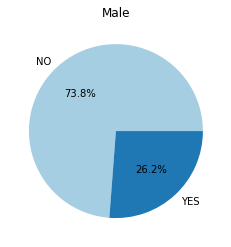

In [24]:
dm=data.loc[data.gender == 'Male', ]
plt.title('Male')
plt.pie(dm.Churn.value_counts(), labels = ["NO", "YES"],  colors = sns.color_palette("Paired"), autopct = '%1.1f%%')
pass

Следовательно, половой признак не оказывает большого влияния на классификацию.

Проверим существует ли закономерность между целевой функцией и наличием у клиента партнера:

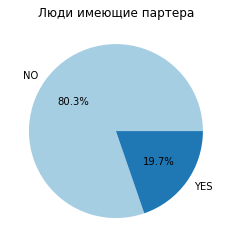

In [25]:
dm=data.loc[data.Partner == 'Yes', ]
dm
plt.title('Люди имеющие партера')
plt.pie(dm.Churn.value_counts(), labels = ["NO", "YES"],  colors = sns.color_palette("Paired"), autopct = '%1.1f%%')
pass

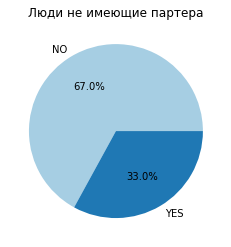

In [26]:
dm=data.loc[data.Partner == 'No', ]
dm
plt.title('Люди не имеющие партера')
plt.pie(dm.Churn.value_counts(), labels = ["NO", "YES"],  colors = sns.color_palette("Paired"), autopct = '%1.1f%%')
pass

Люди имеющие партнера реже отказывались от услуг компании, предположительно из-за того, что доход семью с партнером выше.

Рассмотрим отток клиентов в зависимости от ежемесячных платжей:

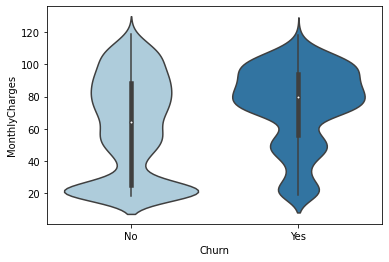

In [27]:
sns.violinplot(x="Churn", y="MonthlyCharges", data=data, palette = sns.color_palette("Paired"))
pass

Из скрипичных графиков видно, что в существует зависимость оттока клиентов от размера ежемесячного платежа: при более низкой плате - клиенты оставались, наиболее частый отток наблюдается с повышением тарифа.

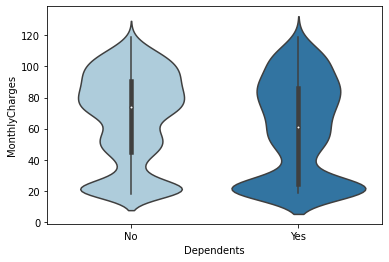

In [28]:
sns.violinplot(x="Dependents", y="MonthlyCharges", data=data, palette = sns.color_palette("Paired"))
pass

Так же можно установить зависимость между стоимостью тарифа и наличием иждивенцев (дети, бабушки, дедушки, родители) в семье. Граждане, обеспечивающие иждевенцев материально, чаще выбирают наиболее дешевый тариф.

In [29]:
corr_mat = data.corr()
corr_mat

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [30]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

tenure          TotalCharges    0.825880
MonthlyCharges  TotalCharges    0.651065
dtype: float64

Полученные корреляционные значения подтверждают зависимости установленные выше с помощью графиков.

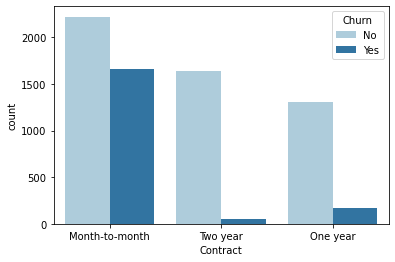

In [31]:
sns.countplot(x='Contract', order=data['Contract'].value_counts().index, hue='Churn',palette = sns.color_palette("Paired"), data=data)
pass

Можно заметить, что большинство отказов от продолжения пользования услугами телекомуникационной компании приходится на ежемесячные контракты.

### 3. Обработка пропущенных значений
Явных пропущенных значений не имееется:

In [32]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Однако в некоторых признаках, свидетельствующих о подключении различных видов услуг в некоторых ячейках приводится *No internet service*. Заменим данное значение на *No* в столбцах *OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV,StreamingMovies*, чтобы привести признаки к бинарному типу.

In [33]:
data.loc[(data.OnlineSecurity == "No internet service"), 'OnlineSecurity'] = 'No'
data.loc[(data.OnlineBackup == "No internet service"), 'OnlineBackup'] = 'No'
data.loc[(data.DeviceProtection == "No internet service"), 'DeviceProtection'] = 'No'
data.loc[(data.TechSupport == "No internet service"), 'TechSupport'] = 'No'
data.loc[(data.StreamingTV == "No internet service"), 'StreamingTV'] = 'No'
data.loc[(data.StreamingMovies == "No internet service"), 'StreamingMovies'] = 'No'

Так же признак *MultipleLines* имеет 3 варианта: Yes, No, No phone service.
Заменим *No phone service* на *No*, чтобы привести признак к бинарному типу.


In [34]:
data.loc[(data.MultipleLines == "No phone service"), 'MultipleLines'] = 'No'

###  4. Обработка категориальных признаков

In [35]:
data_describe = data.describe(include = ['category'])

In [36]:
print (categorical_columns)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [37]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn'] ['InternetService', 'Contract', 'PaymentMethod']


In [38]:
len(binary_columns)


13

In [39]:
len(nonbinary_columns)

3

In [40]:
for i in binary_columns:
    data[i] = pd.factorize(data[i])[0]

In [41]:
InternetService_dummies = pd.get_dummies(data['InternetService'])
data = pd.concat((data, InternetService_dummies), axis=1)
data = data.drop(['InternetService'], axis=1)

In [42]:
Contract_dummies = pd.get_dummies(data['Contract'])
data = pd.concat((data, Contract_dummies), axis=1)
data = data.drop(['Contract'], axis=1)
PaymentMethod_dummies = pd.get_dummies(data['PaymentMethod'])
data = pd.concat((data, PaymentMethod_dummies), axis=1)
data = data.drop(['PaymentMethod'], axis=1)

### 5. Нормализация количественных признаков
Выполним стандартизацию всех количественных признаков:

In [43]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)

In [44]:
data_stand.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
count,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,...,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03
mean,-4.890223e-16,-7.351359e-16,-1.000337e-16,1.062574e-15,-9.488681e-17,2.104877e-15,5.785096e-16,-1.789745e-16,-4.417526e-16,1.012336e-16,...,-4.524254e-16,-1.185375e-16,-8.853997e-16,-9.179233e-17,-4.089132e-17,-5.744678e-16,7.009941e-18,-4.969795e-16,3.271621e-16,2.848025e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.009358e+00,-4.402958e-01,-1.035543e+00,-6.522585e-01,-1.280157e+00,-3.056117e+00,-8.542748e-01,-6.337013e-01,-1.378232e+00,-7.238665e-01,...,-7.234103e-01,-8.868334e-01,-5.250931e-01,-1.107816e+00,-5.145003e-01,-5.613245e-01,-5.299381e-01,-5.253134e-01,-7.118128e-01,-5.435649e-01
25%,-1.009358e+00,-4.402958e-01,-1.035543e+00,-6.522585e-01,-9.542285e-01,3.271661e-01,-8.542748e-01,-6.337013e-01,-1.378232e+00,-7.238665e-01,...,-7.234103e-01,-8.868334e-01,-5.250931e-01,-1.107816e+00,-5.145003e-01,-5.613245e-01,-5.299381e-01,-5.253134e-01,-7.118128e-01,-5.435649e-01
50%,9.905875e-01,-4.402958e-01,9.655394e-01,-6.522585e-01,-1.394072e-01,3.271661e-01,-8.542748e-01,-6.337013e-01,7.254640e-01,-7.238665e-01,...,-7.234103e-01,-8.868334e-01,-5.250931e-01,9.025485e-01,-5.145003e-01,-5.613245e-01,-5.299381e-01,-5.253134e-01,-7.118128e-01,-5.435649e-01
75%,9.905875e-01,-4.402958e-01,9.655394e-01,1.532916e+00,9.198605e-01,3.271661e-01,1.170417e+00,1.577806e+00,7.254640e-01,1.381274e+00,...,1.382145e+00,1.127447e+00,-5.250931e-01,9.025485e-01,-5.145003e-01,-5.613245e-01,-5.299381e-01,-5.253134e-01,1.404664e+00,-5.435649e-01
max,9.905875e-01,2.270878e+00,9.655394e-01,1.532916e+00,1.612459e+00,3.271661e-01,1.170417e+00,1.577806e+00,7.254640e-01,1.381274e+00,...,1.382145e+00,1.127447e+00,1.904153e+00,9.025485e-01,1.943357e+00,1.781247e+00,1.886745e+00,1.903355e+00,1.404664e+00,1.839445e+00


### 6. Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [45]:

X = data_stand.drop(['Churn'], axis=1)
y = data['Churn']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(5274, 1758)

### 7. Заупустим классификатор ближайших соседей (kNN):

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [48]:
knn

KNeighborsClassifier(n_neighbors=10)

In [49]:
y_test_predict = knn.predict(X_test)

### 8. Вычисление ошибки на тестовой и обучающей выборке:

In [50]:
err_test  = np.mean(y_test  != y_test_predict)

In [51]:
err_test

0.22810011376564276

In [52]:
err_train = np.mean(y_train != knn.predict(X_train))

In [53]:
err_train

0.1863860447478195

In [54]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[1152  148]
 [ 253  205]]


In [55]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

### Подберем наиболее удачные параметры:

In [56]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print('Ошибка на кросс-валидации: ', best_cv_err)
print('Оптимальное количество соседей: ', best_n_neighbors)

Ошибка на кросс-валидации:  0.20838113104479328
Оптимальное количество соседей:  25


Запустим kNN для оптимального количества соседей:

In [57]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.1962457337883959
Ошибка на тестовой выборке:  0.22013651877133106


При параметре 25 ближайших соседей мы получили наименьшую ошибку обучающей выборке.

## Выводы

Проанализировав датасет, мы определили, что:
- классы оттока клиентов являются несбалансированными - люди чаще остаются клиентами компании, нежели разрывают контракт(73% на 27%)
- количество мужчин и женщин примерно одинаковое
- отток клиентов не зависит от полового признака
- нет никакой зависимости между количеством месяцев пользования услугами компании и стоимостью ежемесячных платежей нет.
- однако существуют зависимости между количеством месяцев пользования услугами компании и общей суммой расходов клиента, а так же между ежемесячными платежами и общей суммой расходов клиента.
-  при более низкой стоимости ежемесячного платежа - клиенты оставались, наиболее частый отток наблюдается с повышением тарифа.
- клиенты, обеспечивающие иждевенцев материально, чаще выбирают наиболее дешевый тариф.
- большинство отказов от продолжения пользования услугами телекомуникационной компании приходится на ежемесячные контракты

  Метод ближайшах соседей, при оптимальном количестве соседей, составил 21%  ошибок на обучающей выборке (с наименьшей ошибкой кросс-валидации) и 22% на тестовой выборке.

  Получившаяся точность имеет место быть, хоть она и не высокая. По данным признакам с вероятностью 78% можно определить останется клиент использовать услуги компании и дальше, после истечения срока контракта или же откажется от дальнейшего сотрудничества.

### Другие классификаторы

***Random Forest***

In [58]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.0017064846416382253
Ошибка на тестовой выборке:  0.2150170648464164


***Extremely Randomized Trees***

In [59]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.0017064846416382253
Ошибка на тестовой выборке:  0.23094425483503983


***SVC***

In [60]:

from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.17633674630261661
Ошибка на тестовой выборке:  0.20819112627986347


***AdaBoost***

In [61]:

ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.18430034129692832
Ошибка на тестовой выборке:  0.20193401592718999


***GBT***

In [62]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.17102768297307547
Ошибка на тестовой выборке:  0.2161547212741752


*Лучший результат показал классификатор AdaBoost (ошибка на тестовой выборке 20%)*
Таким образом, использование другого классификатора показало более низкую ошибку предсказания.


## *Нейронная сеть*

### Разбиваем данные на обучающую и тестовую выборки

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)


In [64]:
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(4711, 2321)

#### *Обучаем классификатор для одного скрытого слоя из 50 нейронов:*

In [69]:
from sklearn.neural_network import MLPClassifier

In [70]:
mlp_model = MLPClassifier(hidden_layer_sizes = (50,),
                          solver = 'lbfgs',
                          activation = 'logistic',
                          max_iter = 1000,
                          random_state = 42)

In [71]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
%%time
mlp_model.fit(X_train, y_train)

Wall time: 11.9 s


MLPClassifier(activation='logistic', hidden_layer_sizes=(50,), max_iter=1000,
              random_state=42, solver='lbfgs')

#### *Проверяем качество классификатора*

In [73]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(y_train, y_train_pred)

0.9876883888770962

In [76]:
accuracy_score(y_test, y_test_pred)

0.7384747953468332

#### *Ошибки на обучающей и тестовой выборках:*

In [77]:
print('Ошибка на обучающей выборке: ',np.mean(y_train != y_train_pred)) 
print ('Ошибка на тестовой выборке: ',np.mean(y_test != y_test_pred))

Ошибка на обучающей выборке:  0.012311611122903842
Ошибка на тестовой выборке:  0.26152520465316675


### Подбор параметра alpha для одного скрытого слоя с 50 нейронами

Подберем *оптимальное* значение параметра регуляризации alpha

In [78]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (50,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

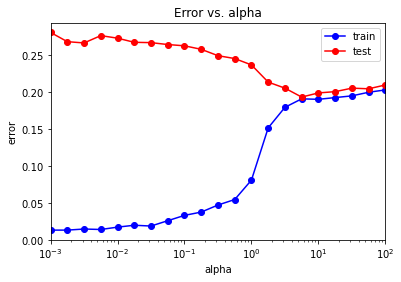

In [79]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

Рассмотрим как менялась метрика в зависимости от гиперпараметра:

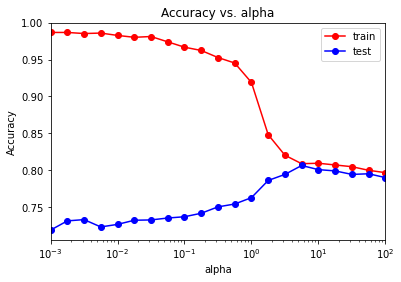

In [80]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Минимальное значение ошибки:

In [81]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Минимальная ошибка на обучающей выборке: ',min_train_err)
print('Мигимальная ошибка на тестовой выборке: ', min_test_err)

Минимальная ошибка на обучающей выборке:  0.01337295690936107
Мигимальная ошибка на тестовой выборке:  0.1934510986643688


Оптимальное значение alpha:

In [82]:
alpha_opt = alpha_arr[test_err == min_test_err][0]
print(alpha_opt)

5.623413251903491


### Классификатор для одного скрытого слоя нейронной сети при найденном оптимальном значении alpha:

Повторим обучение:

In [83]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (50,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print('Ошибка на обучающей выборке: ',np.mean(y_train != y_train_pred))
print('Ошибка на тестовой выборке: ',np.mean(y_test != y_test_pred))

Ошибка на обучающей выборке:  0.19104224156230099
Ошибка на тестовой выборке:  0.1934510986643688


In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1704
           1       0.67      0.53      0.59       617

    accuracy                           0.81      2321
   macro avg       0.76      0.72      0.73      2321
weighted avg       0.80      0.81      0.80      2321



### Подбор оптимального количества нейронов для скрытого слоя с заданным значением alpha

In [85]:
hidden_layer_arr = np.arange(3, 50)
test_err = []
train_err = []
train_acc = []
test_acc = []

for count in hidden_layer_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (count), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

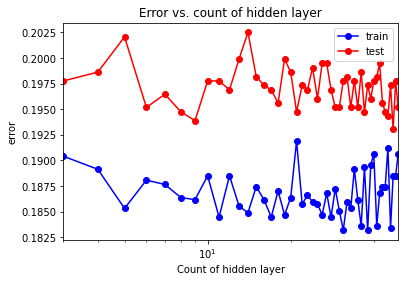

In [86]:
plt.semilogx(hidden_layer_arr, train_err, 'b-o', label = 'train')
plt.semilogx(hidden_layer_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer_arr), np.max(hidden_layer_arr)])
plt.title('Error vs. count of hidden layer')
plt.xlabel('Count of hidden layer')
plt.ylabel('error')
plt.legend()

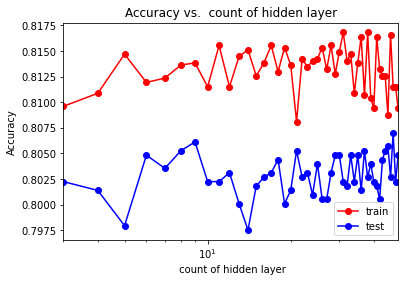

In [87]:
plt.semilogx(hidden_layer_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(hidden_layer_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer_arr), np.max(hidden_layer_arr)])
plt.title('Accuracy vs.  count of hidden layer')
plt.xlabel(' count of hidden layer')
plt.ylabel('Accuracy')
plt.legend()

In [88]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Минимальная ошибка на обучающей выборке: ', min_train_err)
print('Минимальная ошибка на тестовой выборке: ', min_test_err)

Минимальная ошибка на обучающей выборке:  0.1831882827425175
Минимальная ошибка на тестовой выборке:  0.1930202498922878


In [89]:
hidden_layer_opt1 = hidden_layer_arr[test_err == min_test_err][0]
print('Оптимальное количество нейронов первого скрытого слоя:',hidden_layer_opt1)

Оптимальное количество нейронов первого скрытого слоя: 47


### Классификатор для одного скрытого слоя с оптимальным количеством нейронов, при данном значении alpha:

In [90]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (hidden_layer_opt1),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print('Ошибка на обучающей выборке: ',np.mean(y_train != y_train_pred))
print('Ошибка на тестовой выборке: ',np.mean(y_test != y_test_pred))

Ошибка на обучающей выборке:  0.18849501167480365
Ошибка на тестовой выборке:  0.1930202498922878


In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1704
           1       0.68      0.53      0.59       617

    accuracy                           0.81      2321
   macro avg       0.76      0.72      0.73      2321
weighted avg       0.80      0.81      0.80      2321



### Подбор количества нейронов для второго скрытого слоя:

In [92]:
hidden_layer_arr = np.arange(3, 0)
test_err = []
train_err = []
train_acc = []
test_acc = []

for count in hidden_layer_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (hidden_layer_opt1, count), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

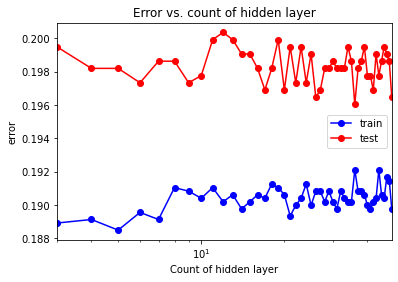

In [93]:
plt.semilogx(hidden_layer_arr, train_err, 'b-o', label = 'train')
plt.semilogx(hidden_layer_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer_arr), np.max(hidden_layer_arr)])
plt.title('Error vs. count of hidden layer')
plt.xlabel('Count of hidden layer')
plt.ylabel('error')
plt.legend()

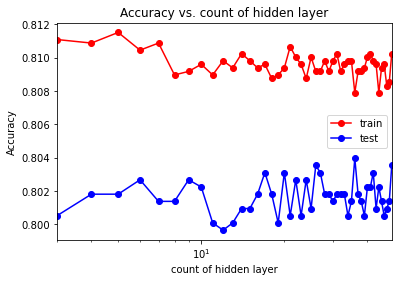

In [100]:
plt.semilogx(hidden_layer_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(hidden_layer_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer_arr), np.max(hidden_layer_arr)])
plt.title('Accuracy vs. count of hidden layer')
plt.xlabel('count of hidden layer')
plt.ylabel('Accuracy')
plt.legend()

In [95]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Минимальная ошибка на обучающей выборке: ', min_train_err)
print('Минимальная ошибка на тестовой выборке: ', min_test_err)

Минимальная ошибка на обучающей выборке:  0.18849501167480365
Минимальная ошибка на тестовой выборке:  0.19603619129685482


In [96]:
hidden_layer_opt2 = hidden_layer_arr[test_err == min_test_err][0]
print('Оптимальное количество нейронов второго скрытого слоя:',hidden_layer_opt2)

Оптимальное количество нейронов второго скрытого слоя: 36


### Классификатор для нейронной сети с двумя скрытыми слоями с оптимальным количеством нейронов, при данном значении alpha:

In [97]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (hidden_layer_opt2),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print('Ошибка на обучающей выборке: ',np.mean(y_train != y_train_pred))
print('Ошибка на тестовой выборке: ',np.mean(y_test != y_test_pred))

Ошибка на обучающей выборке:  0.18361282105710042
Ошибка на тестовой выборке:  0.1986212839293408


In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1704
           1       0.66      0.52      0.58       617

    accuracy                           0.80      2321
   macro avg       0.75      0.71      0.73      2321
weighted avg       0.79      0.80      0.79      2321



# Выводы:
* Лучший результат, по сравнению с другими классификаторами, показала нейронная сеть с одним скрытым слоем, состоящим из 47 нейронов при оптимальном параметре alpha ≈ 5.623:

  *Ошибка на обучающей выборке:  18,9%*
  
  *Ошибка на тестовой выборке:   19,3%*
  
  
* При классификации сетью с двумя скрытыми слоями, результат оказался немного хуже на тестовой выборке:

  *Ошибка на обучающей выборке:  0.18,4%
  
  *Ошибка на тестовой выборке:  19,9%*
  
  
* По графикам зависимости ошибки на обучающей выборке и тестовой выборках от параметра alpha можно заметить недообучение при alpha < 1 в сети с одним скрытым слоем